<a href="https://colab.research.google.com/github/OlehVorobiov/Math-2024-25-Winter/blob/main/docs/Interactives/PiBuffonNeedleEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

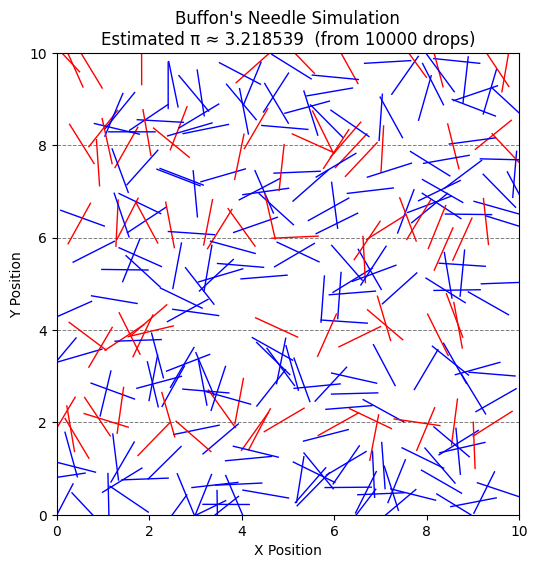

np.float64(3.21853878339234)

In [169]:
import numpy as np
import matplotlib.pyplot as plt

def buffon_needle_simulation(num_drops=10000, needle_length=1.0, line_spacing=2.0, plot=True):
    if needle_length > line_spacing:
        raise ValueError("Needle length must be less than or equal to the distance between lines.")

    # Random angle theta ∈ [0, π], and distance y ∈ [0, d/2]
    theta = np.random.uniform(0, np.pi, num_drops)
    y_center = np.random.uniform(0, line_spacing / 2, num_drops)

    # A crossing occurs if (l/2) * sin(theta) ≥ y
    crosses = (needle_length / 2) * np.sin(theta) >= y_center
    num_crosses = np.sum(crosses)

    # Estimate π using the formula
    if num_crosses == 0:
        pi_estimate = np.inf  # Avoid division by zero
    else:
        pi_estimate = (2 * needle_length * num_drops) / (line_spacing * num_crosses)

    # Optional visualization
    if plot:
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.set_aspect('equal')
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 10)

        # Draw horizontal lines spaced by `line_spacing`
        for y in np.arange(0, 10 + line_spacing, line_spacing):
            ax.axhline(y, color='gray', linestyle='--', linewidth=0.7)

        # Simulate needle positions for plotting (just the first ~300 for clarity)
        num_visual = min(num_drops, 300)
        x_centers = np.random.uniform(0, 10, num_visual)
        y_centers = np.random.uniform(0, 10, num_visual)
        theta_vis = np.random.uniform(0, np.pi, num_visual)

        x_start = x_centers - (needle_length / 2) * np.cos(theta_vis)
        x_end = x_centers + (needle_length / 2) * np.cos(theta_vis)
        y_start = y_centers - (needle_length / 2) * np.sin(theta_vis)
        y_end = y_centers + (needle_length / 2) * np.sin(theta_vis)

        for i in range(num_visual):
            color = 'red' if int(y_start[i] / line_spacing) != int(y_end[i] / line_spacing) else 'blue'
            ax.plot([x_start[i], x_end[i]], [y_start[i], y_end[i]], color=color, linewidth=1)

        ax.set_title(f"Buffon's Needle Simulation\nEstimated π ≈ {pi_estimate:.6f}  (from {num_drops} drops)")
        ax.set_xlabel("X Position")
        ax.set_ylabel("Y Position")
        plt.grid(False)
        plt.show()

    return pi_estimate

# Example usage:
buffon_needle_simulation(num_drops=10000, needle_length=1.0, line_spacing=2.0)
